# 平滑化事前分布の調査

```
x[n] = 2x[n-1] + x[n-2] + e[n]
```
という形で与えられるxの平滑化事前分布に関して調査

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [93]:
N = 300
sigma = 1

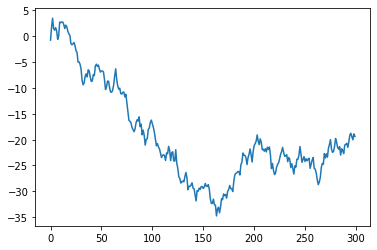

In [94]:
e = np.random.normal(0, sigma, N)
sns.lineplot(np.arange(N), np.cumsum(e))

In [95]:
def seq1(e):
    ret = np.zeros_like(e)
    ret[:2] = e[:2]
    for i in range(2, len(e)):
        ret[i] = 2 * ret[i-1] - ret[i-2] + e[i]
    return ret

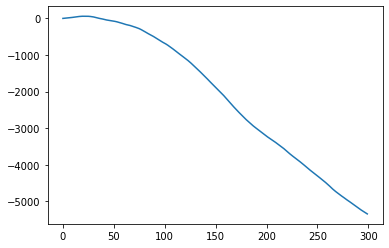

In [96]:
x = seq1(e)
sns.lineplot(np.arange(N), x)

xは、滑らかな曲線になる傾向がある。

上の漸化式を、行列の掛け算で表すと

In [97]:
def mat1(n):    
    ret = np.zeros((n, n), dtype=np.int)
    ret[0,0] = 1
    ret[1,1] = 1
    for i in range(2, n):
        ret[i,0] = - i + 1
        for j in range(1, i+1):
            ret[i,j] = i+1 - j
    return ret

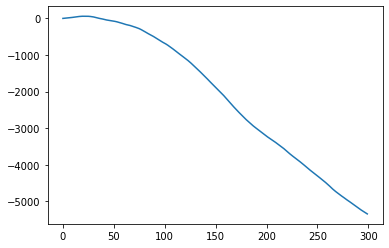

In [99]:
A = mat1(N)
x2 = np.dot(A, e)
sns.lineplot(np.arange(N), x2)

漸化式で計算したのと全く同じ値が得られた。xの共分散行列を固有値分解してやると

In [102]:
lmd, Sigma = np.linalg.eig(np.dot(A, A.T))

検算しておく

In [110]:
print(np.dot(np.dot(Sigma, np.diag(lmd)), Sigma.T)[1,1:10])
print(np.dot(A, A.T)[1,1:10])

[1.         2.00000001 2.99999999 4.         5.         6.
 7.         8.         9.        ]
[1 2 3 4 5 6 7 8 9]


```
y = np.dot(np.dot(Sigma, np.diag(lmd**0.5)), eta)
```
は、xと同じ分布に従う。つまり、乱数`eta`を たくさん発生させると、滑らかな曲線ばっか出てくる

In [144]:
def gen1():
    e = np.random.normal(0, sigma, N)
    return seq1(e)

def gen2():
    eta = np.random.normal(0, sigma, N)
    return np.dot(np.dot(Sigma, np.diag(lmd**0.5)), eta)

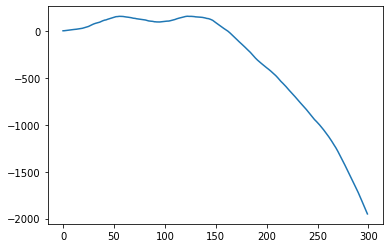

In [153]:
sns.lineplot(range(N), gen1())

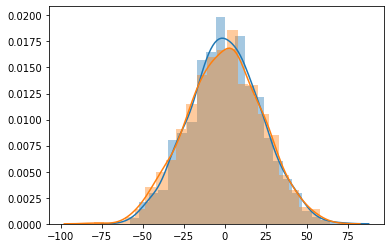

In [173]:
T = 1000
v1 = np.zeros((T, N))
v2 = np.zeros_like(v1)
for i in range(T):
    v1[i,] = gen1()
    v2[i,] = gen2()
    
pos = 10
sns.distplot(v1[:,pos])
sns.distplot(v2[:,pos])

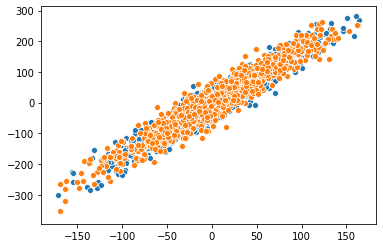

In [157]:
pos1, pos2 = 20, 30
sns.scatterplot(v1[:,pos1], v1[:,pos2])
sns.scatterplot(v2[:,pos1], v2[:,pos2])

同じ分布っぽい。lmd と Sigmaを調べてみる

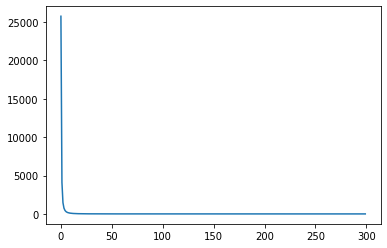

In [160]:
plt.plot(lmd**0.5)

減衰がすごい。最初の10個だけ見てみる

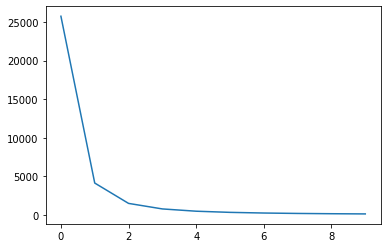

In [167]:
plt.plot(lmd[:10]**.5)

曲線のほとんどの形を決める最初の10個のベクトルを見てみると

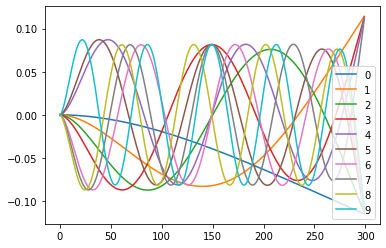

In [172]:
for i in range(10):
    sns.lineplot(range(N), Sigma[:,i], label=i)

後ろの方に行くほど、高周波成分を担当していることが分かる。